In [7]:
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [8]:
def extract_feature(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs=np.mean(librosa.feature.mfcc(audio , sample_rate, n_mfcc=25 ).T, axis=0)
    mels=np.mean(librosa.feature.melspectrogram(audio, sample_rate, n_mels=25, fmax=8000).T, axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=audio, sr=sample_rate ,n_chroma=25).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=audio, sr=sample_rate,n_chroma=25, bins_per_octave=None).T,axis=0)
    #chroma_cens = np.mean(librosa.feature.chroma_cens(y=audio, sr=sample_rate,n_chroma=40).T,axis=0)
    
    return mfccs,mels,chroma_stft,chroma_cq#,chroma_cens

In [9]:
a=extract_feature("UrbanSound8K/audio/fold1/103074-7-0-1.wav")

In [10]:
metadata=pd.read_csv("UrbanSound8k/metadata/UrbanSound8k.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [12]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            mfccs,mels,chroma_stft,chroma_cq = extract_feature(fn)
            features=np.reshape(np.vstack((mfccs,mels,chroma_stft,chroma_cq)),(25,4))
    
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold1/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=476
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=358
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=179
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=448
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=224
  warnings.warn(
C:\Users\pc\Anaconda3\lib\s

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=454
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=227
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=441
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=459
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=354
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=418
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWa

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=128
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=341
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=510
  warnings.warn(


UrbanSound8K/audio/fold2/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=280
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=342
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=171
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=479
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=304
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=152
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWa

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=473
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=183
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=386
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=261
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=399
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=200
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWa

UrbanSound8K/audio/fold3/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=457
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=311
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=156
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=78
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=88
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=266
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarn

UrbanSound8K/audio/fold4/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=338
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=259
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=417
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=486
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=257
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=320
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWa

UrbanSound8K/audio/fold5/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=94
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=281
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=141
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=164
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=100
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=437
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWar

UrbanSound8K/audio/fold6/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=368
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=439
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=427
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=293
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=147
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=74
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWar

UrbanSound8K/audio/fold7/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=396
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=394
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=99
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=413
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=212
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=217
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWar

UrbanSound8K/audio/fold8/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=334
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=273
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=390
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=297
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=299
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=196
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWa

UrbanSound8K/audio/fold9/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=59
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=234
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=162
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=309
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=114
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=246
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWar

UrbanSound8K/audio/fold10/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=140
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=350
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=329
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=446
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=406
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=512 is too small for input signal of length=203
  warnings.warn(


Exceptions:  10
time taken: 110.0 minutes 33.7 seconds
None
Finished feature extraction from all folder


In [13]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[-403.96762, 94.39807, 17.75182, -11.521064],...","(25, 4)",dog_bark,1
1,"[[-368.11005, 128.74481, 28.91274, -21.190054]...","(25, 4)",dog_bark,1
2,"[[-422.47903, 70.38348, 9.934862, 0.0006177604...","(25, 4)",dog_bark,1
3,"[[-260.24, 109.35181, -51.811283, -4.287414], ...","(25, 4)",dog_bark,1
4,"[[-386.78485, 132.62961, 25.220676, 22.799538]...","(25, 4)",gun_shot,1


In [14]:
Stacked_feature_pd.Label.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder

X = np.reshape(np.array(Stacked_feature_pd.Stacked_Features.tolist()), (8732, 100))
y = np.array(Stacked_feature_pd.Label.tolist())

le = LabelEncoder()
yy = le.fit_transform(y)
print(yy.shape)

(8732,)


In [16]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [17]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(X), yy, test_size=0.2,random_state=42)

In [18]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 100) (1747, 100) (6985,) (1747,)


In [19]:
print(x_train[0][:10])

[-0.6894514  -0.04691766 -1.0600822  -0.08705591 -0.7620535  -0.6229462
  0.16864659 -1.5024855   0.5692391  -1.4576662 ]


### Classification using KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn_model=KNeighborsClassifier(n_neighbors=6) 

In [22]:
x_train=np.reshape(x_train,(6985,100))
x_test=np.reshape(x_test,(1747,100))
x_train.shape

(6985, 100)

In [23]:
start_time=timer()
knn_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 1.17 secs


In [24]:
print("Training accuracy is {:.2f}".format(knn_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(knn_model.score(x_test, y_test)))

Training accuracy is 0.90
Testing accuracy is 0.85


### Classification using Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)

In [30]:
start = timer()
log.fit(x_train, y_train)
end = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end - start)//60 , (end - start)%60 ))

Total time required is 0.00 mins and 5.91 secs


In [31]:
print("Training accuracy is {}".format(log.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(log.score(x_test, y_test)))

Training accuracy is 0.7657838224767358
Testing accuracy is 0.72


### Classification using Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [33]:
start_time=timer()
tree_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 5.37 secs


In [34]:
print("Training accuracy is {}".format(tree_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(tree_model.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.71


### Classification using SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svc= SVC(kernel="rbf")

In [37]:
start_time=timer()
svc.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 18.50 secs


In [38]:
print("Training accuracy is {}".format(svc.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy is 0.9242662848962061
Testing accuracy is 0.88


### Classification using Ensemble Classifiers

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf=RandomForestClassifier(n_estimators=500)

In [41]:
start_time=timer()
rf.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 2.00 mins and 18.36 secs


In [42]:
print("Training accuracy is {}".format(rf.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(rf.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.91


**Overfitting using RandomForestClassifiers**

In [43]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [44]:
bg=BaggingClassifier()

In [45]:
start_time = timer()
bg.fit(x_train, y_train)
end_time = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 29.51 secs


In [46]:
print("Training accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_train, y_train)) )
print("Testing accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_test, y_test)) )

Training accuracy of the Bagging Classifier 1.00
Testing accuracy of the Bagging Classifier 0.84


In [47]:
ada= AdaBoostClassifier()

In [48]:
start_time= timer()
ada.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 24.67 secs


In [49]:
print("Training accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_train, y_train)) )
print("Testing accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_test, y_test)) )

Training accuracy of the AdaBoost Classifier 0.49
Testing accuracy of the AdaBoost Classifier 0.48


In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gbc = GradientBoostingClassifier()
start_time= timer()
gbc.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 10.00 mins and 22.99 secs


In [52]:
print("Training accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_train, y_train)) )
print("Testing accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_test, y_test)) )

Training accuracy of the Gradient Boosting Classifier 0.96
Testing accuracy of the Gradient Boosting Classifier 0.86


In [53]:
### Unsupervised Learning 
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=10)

In [54]:
kms.fit(x_train)

KMeans(n_clusters=10)

In [55]:
pd.crosstab(kms.predict(x_train), y_train)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,128,24,147,66,371,116,130,408,37,79
1,40,41,65,144,74,13,0,2,210,276
2,0,137,1,7,8,0,0,0,0,2
3,68,5,25,15,38,244,2,55,9,22
4,133,129,398,389,144,39,10,67,295,337
5,0,0,0,1,5,54,2,0,0,3
6,176,3,25,16,107,242,1,163,8,31
7,255,15,138,152,31,94,172,88,58,55
8,0,0,0,2,0,0,0,0,0,0


In [56]:
### Visualizing the clusters formed with the MFCC features 
from sklearn.decomposition import PCA

In [57]:
cols=["mfcc_"+str(i) for i in range(1,101)]

In [58]:
mfcc_pd=pd.DataFrame(data=scaler.fit_transform(X), columns=cols)
mfcc_pd["labels"]=y
mfcc_pd.head()


,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_92,mfcc_93,mfcc_94,mfcc_95,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,labels
0,-1.335568,-0.432280,1.473788,-1.496428,0.392031,-0.741681,-0.599690,-1.659316,-0.094190,-1.683408,...,0.125511,0.151166,0.189610,0.304042,0.437349,0.539501,0.988594,1.110700,0.156734,dog_bark
1,-1.059367,0.278793,1.829077,-1.938912,-0.102203,-0.838932,-1.537612,-2.630491,-1.341901,-2.100286,...,0.041281,0.068587,0.144736,0.135701,0.308239,0.250154,-0.004774,0.221530,0.096346,dog_bark
2,-1.478156,-0.929449,1.224947,-0.969159,0.972687,-0.766023,-0.103434,-1.215856,0.554401,-1.123702,...,-0.019301,-0.010655,0.080819,0.386288,0.512793,0.568032,0.984057,1.964769,1.424461,dog_bark
3,-0.228475,-0.122696,-0.740641,-1.165393,-0.295722,-0.829967,0.107546,-0.386138,0.921519,0.337442,...,-0.532736,-0.335513,-0.583633,-0.623070,-0.807428,-0.453972,-0.515252,-0.602799,-0.440847,dog_bark
4,-1.203214,0.359220,1.711547,0.074192,0.204635,-0.711626,0.128832,-0.227408,0.877789,-0.201812,...,2.103852,0.671020,0.354069,0.514783,0.243793,-0.012884,0.201867,0.007208,-0.166132,gun_shot


In [59]:
pca=PCA(n_components=2)

In [60]:
pcas=pca.fit_transform(mfcc_pd.drop("labels", axis=1))

In [61]:
pca_cols=["pca_"+str(i) for i in range(1,3)]

In [62]:
main_df=pd.DataFrame(data=pcas, columns=pca_cols)
main_df["labels"]=y
main_df.head()

,pca_1,pca_2,labels
0,0.393032,0.670188,dog_bark
1,1.844222,1.329870,dog_bark
2,-2.058114,0.170506,dog_bark
3,1.178928,0.263723,dog_bark
4,-4.132043,-0.791298,gun_shot


In [63]:
main_df.labels.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

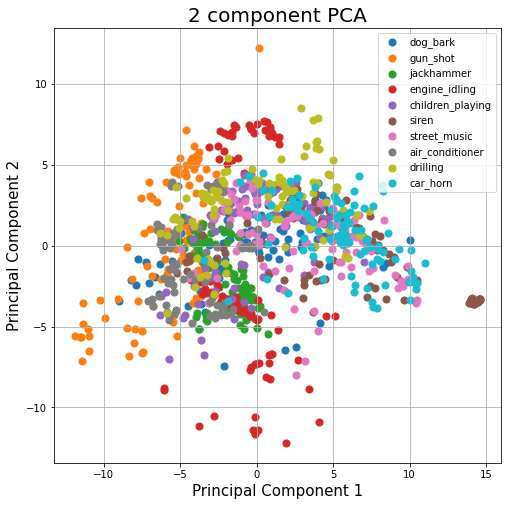

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['labels']== target
    #print(indicesToKeep[:10])
    ax.scatter(list(main_df.loc[indicesToKeep, 'pca_1'])[:100]
               ,list(main_df.loc[indicesToKeep, 'pca_2'])[:100]
               , c = color
               , s = 50)
ax.legend(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'])
ax.grid()

In [66]:
pcas=pca.explained_variance_ratio_
print("Total information ", sum(pcas))

Total information  0.29507771134376526


In [67]:
x_train, x_test, y_train, y_test = train_test_split(main_df.drop("labels", axis=1), main_df["labels"], test_size=0.2, random_state=42)

In [68]:
print(x_train.shape
      , x_test.shape, y_train.shape , y_test.shape)

(6985, 2) (1747, 2) (6985,) (1747,)


In [69]:
svc_2=SVC()
svc_2.fit(x_train, y_train)

SVC()

In [70]:
svc_2.score(x_test, y_test)

0.3371493989696623

In [71]:
x_test.shape[1]

2

In [72]:
# Predictions using SVC on 50 features
predictions=svc_2.predict(x_test)


In [73]:
from sklearn.metrics import confusion_matrix

In [74]:
 mat=confusion_matrix(predictions, y_test)

In [75]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [76]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

<ipython-input-75-6ca8ccb31732>:6: RuntimeWarning: invalid value encountered in long_scalars
  acc = (correct / total) * 100


,CLASS,ACCURACY
6,Gun Shot,73.076923
5,Engine Idling,58.558559
8,Siren,51.000000
0,Air Conditioner,46.206897
4,Drilling,36.842105
9,Street Music,27.922078
7,Jackhammer,27.564103
2,Children Playing,21.078431
3,Dog bark,20.700637
1,Car Horn,NaN
